In [31]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [32]:
glass = pd.read_csv("glass.csv")

In [33]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [34]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [35]:
x = glass.iloc[:,0:9]
y = glass.iloc[:,9]

In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [37]:
#applying minmax scalling
X = (x-x.min(axis=0))/(x.max(axis=0))

In [38]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.006428,0.167434,1.000000,0.231429,0.026124,0.009662,0.205065,0.000000,0.0
1,0.004211,0.181818,0.801782,0.305714,0.038722,0.077295,0.148240,0.000000,0.0
2,0.003279,0.161105,0.790646,0.357143,0.042169,0.062802,0.145151,0.000000,0.0
3,0.004244,0.142693,0.821826,0.285714,0.037130,0.091787,0.172329,0.000000,0.0
4,0.004088,0.146145,0.806236,0.271429,0.043363,0.088567,0.163064,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.003312,0.196203,0.000000,0.740000,0.037130,0.012882,0.231624,0.336508,0.0
210,0.003716,0.241082,0.000000,0.485714,0.043098,0.000000,0.183447,0.504762,0.0
211,0.006193,0.208861,0.000000,0.494286,0.047872,0.000000,0.185917,0.520635,0.0
212,0.003494,0.210012,0.000000,0.471429,0.050391,0.000000,0.188388,0.498413,0.0


In [39]:
num_folds =10
kfold = KFold(n_splits=10)

In [40]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model,x,y,cv=kfold)

In [41]:
results

array([0.45454545, 0.90909091, 0.77272727, 0.90909091, 0.14285714,
       0.52380952, 0.47619048, 0.        , 0.0952381 , 0.04761905])

In [42]:
print(results.mean())

0.43311688311688296


Grid search algothirm

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [44]:
x1 = glass.iloc[:,0:9]
y1 = glass.iloc[:,9]

In [45]:
n_neighbors = np.array([2*1+1 for i in range(0,20)])
param_grid = dict(n_neighbors = n_neighbors)

In [46]:
param_grid

{'n_neighbors': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])}

In [47]:
n_neighbors

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [48]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])})

In [49]:
print(grid.best_score_)
print(grid.best_params_)

0.598781838316722
{'n_neighbors': 3}


Visualizing the cv

In [50]:
k_range = range(1, 41)
# empty list to store scores
k_scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, x1, y1, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

0     0.650216
2     0.650216
3     0.645455
4     0.645455
21    0.641991
5     0.641126
18    0.637013
17    0.632468
27    0.632468
25    0.632468
23    0.632468
19    0.632468
26    0.627922
29    0.627706
28    0.627706
20    0.627706
6     0.627056
22    0.623160
30    0.622944
1     0.622511
24    0.618615
16    0.618398
15    0.618182
7     0.617965
9     0.613636
13    0.613636
31    0.613636
32    0.613636
36    0.613420
12    0.609091
11    0.608874
33    0.608874
14    0.604113
34    0.604113
35    0.604113
38    0.599351
8     0.594805
37    0.590043
10    0.589827
39    0.585281
dtype: float64

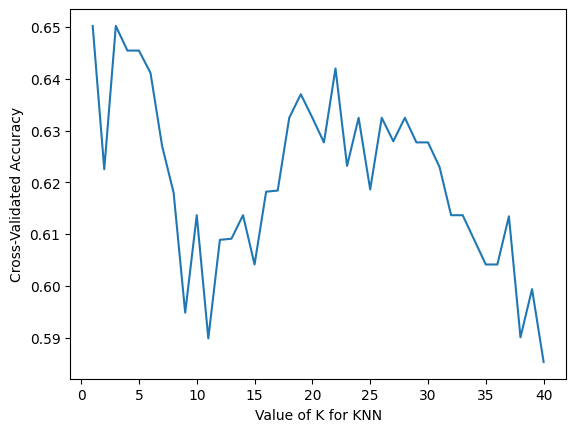

In [51]:
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x1, y1, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()